# Hello everyone today i have cisco sales data analysis

In [21]:
##import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as make_subplot
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [22]:
##read data 
data=pd.read_csv("CSCO(Cisco Systems).csv")

#first five row of data 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,20.120001,20.34,20.010000,20.340000,14.881187,40304500
1,2013-01-03,20.459999,20.50,20.299999,20.450001,14.961663,50603500
2,2013-01-04,20.410000,20.68,20.389999,20.480000,14.983608,36378900
3,2013-01-07,20.379999,20.42,20.160000,20.290001,14.844604,30790700
4,2013-01-08,20.180000,20.34,20.080000,20.309999,14.859232,33218100


In [23]:
## changeing dtype 
data['Date']=pd.to_datetime(data['Date'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2518 non-null   datetime64[ns]
 1   Open       2518 non-null   float64       
 2   High       2518 non-null   float64       
 3   Low        2518 non-null   float64       
 4   Close      2518 non-null   float64       
 5   Adj Close  2518 non-null   float64       
 6   Volume     2518 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.8 KB


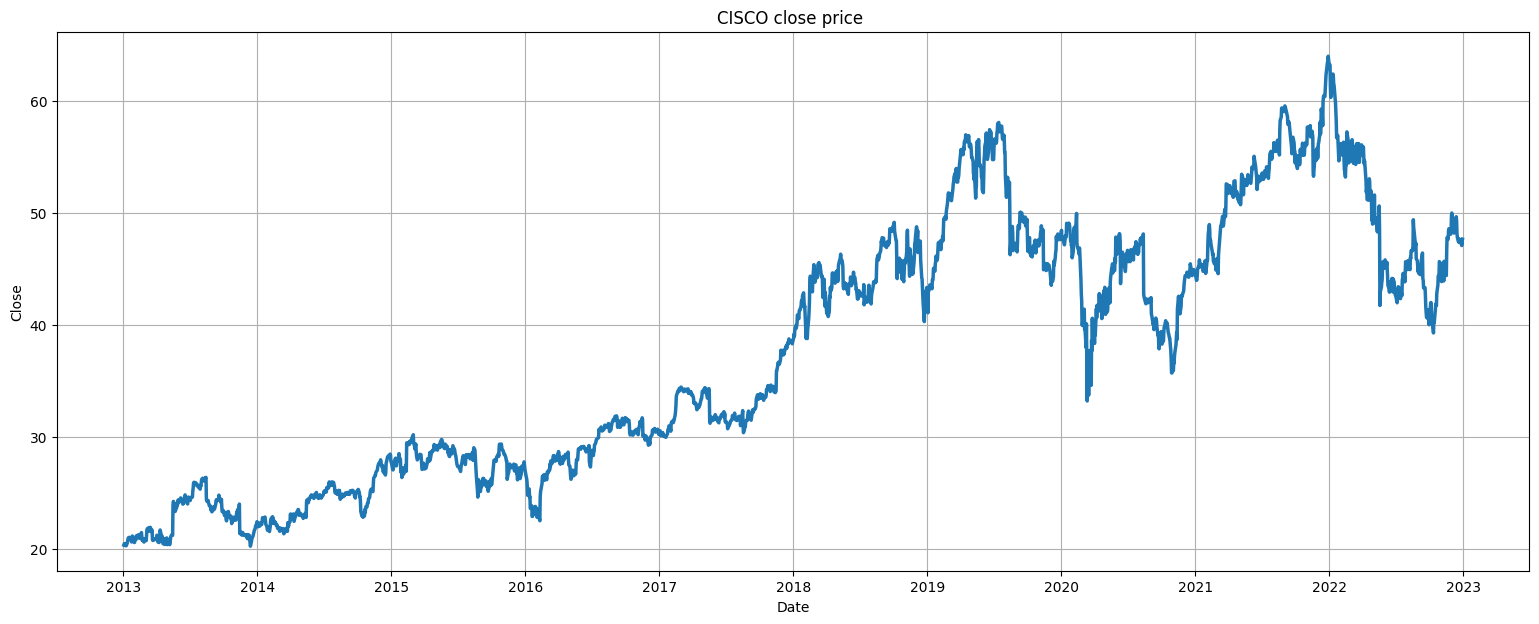

In [25]:
plt.figure(figsize=(19,7))
sns.lineplot(data=data, x='Date',y='Close', linewidth=2.5)
plt.grid(True)
plt.title('CISCO close price ')
plt.show()

In [26]:
##here we cheak our data is stationary or not 
def cheak_stationary(timeseres):
    roll_mean=timeseres.rolling(12).mean()
    roll_std=timeseres.rolling(12).std()
    plt.figure(figsize=(17,7))
    plt.plot(timeseres,color='blue',label='orignal')
    plt.plot(roll_mean,color='red',label='rolling_mean')
    plt.plot(roll_std,color='black',label='rolling_standerd_deviation')
    plt.title('ROLLING MEAN AND STANDARD DEVIATION')
    plt.legend()
    plt.show(block=False)

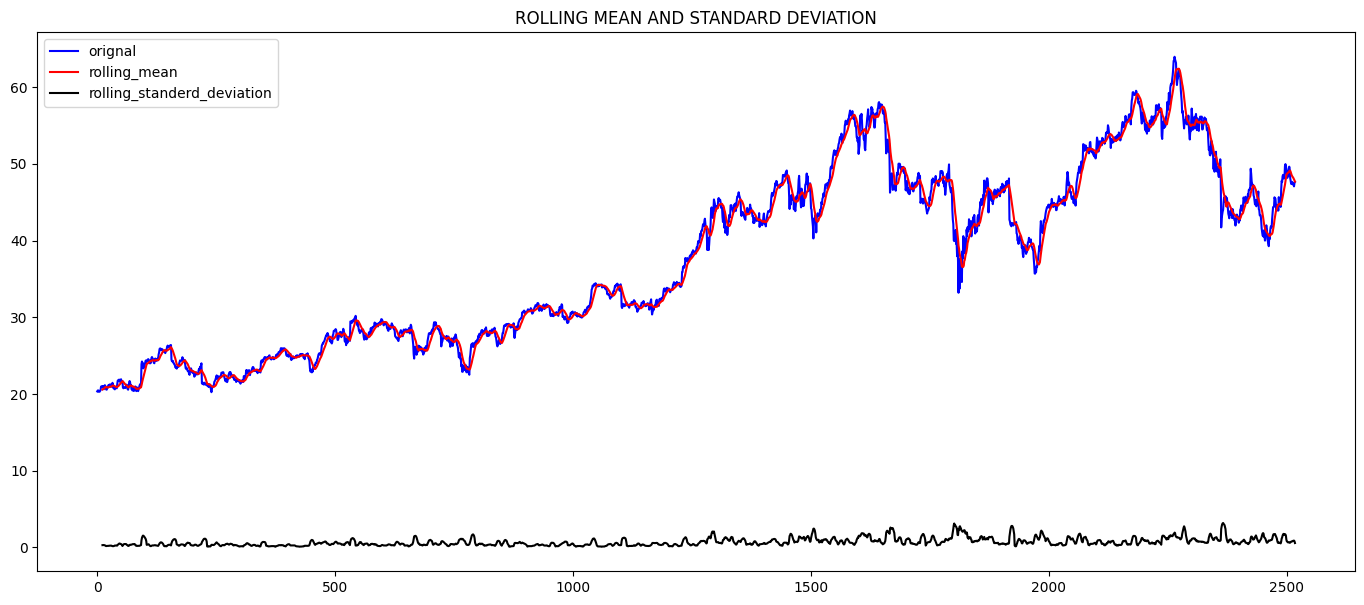

In [27]:
cheak_stationary(data.Close)

In [28]:
##cheaking adifular test
adft=adfuller(data.Close,autolag='AIC')
output= pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
        print(output)

Test Statistics                  -1.524862
p-value                           0.521179
No. of lags used                 22.000000
Number of observations used    2495.000000
critical value (1%)              -3.432974
dtype: float64
Test Statistics                  -1.524862
p-value                           0.521179
No. of lags used                 22.000000
Number of observations used    2495.000000
critical value (1%)              -3.432974
critical value (5%)              -2.862699
dtype: float64
Test Statistics                  -1.524862
p-value                           0.521179
No. of lags used                 22.000000
Number of observations used    2495.000000
critical value (1%)              -3.432974
critical value (5%)              -2.862699
critical value (10%)             -2.567387
dtype: float64


In [29]:
## calculate moving average 
data['ma']=data['Close'].rolling(12,min_periods=1).mean()

[]

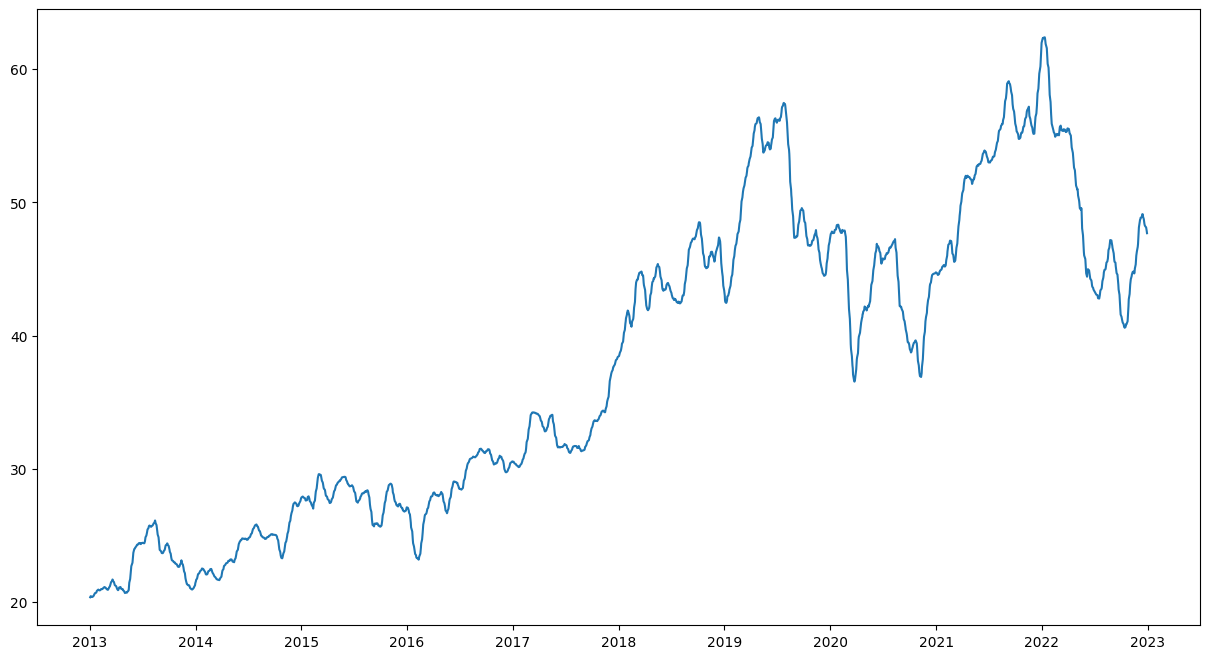

In [30]:
plt.figure(figsize=(15,8))
plt.plot(data.Date,data.ma)
plt.plot()

In [31]:
##split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(data['Close'],data['ma'],test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2014,), (504,), (2014,), (504,))

In [32]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [33]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [35]:
rf_pred=rf.predict(x_test)

In [36]:

print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Coefficient of Determination:", r2_score(y_test, rf_pred))

Mean Absolute Error: 0.8318781286598026
Coefficient of Determination: 0.9890647480130558


In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))
print("Coefficient of Determination:", r2_score(y_test, lr_pred))

Mean Absolute Error: 0.7128778098013352
Coefficient of Determination: 0.9923404815772962
